## Linear Regression

### Exploratory regression analysis to several sets of data

* Scatter plot to decide if a linear model is appropriate.

* Data transform if the relation is not linear.

* OLS model for the original and transformed data.

* Outliers removal and effect in the model (slope, intercept and R-square).


##Imports


---



In [ ]:
# pip install openpyxl
# pip install markdown
# %pip install scipy

In [ ]:
#your work here

#imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import markdown
# pwd
from google.colab import drive
drive.mount('/content/drive')

#
import statsmodels.api as sm
import statsmodels.formula.api as smf


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load Excel file


---



In [ ]:
def multi_excel_loader(filepath):
    # Load Excel file using Pandas
    f = pd.ExcelFile(filepath)
    # Empty list to store individual DataFrames
    list_of_dfs = []
    # Iterate through each worksheet
    for sheet in f.sheet_names:
        df = f.parse(sheet)
        list_of_dfs.append(df)
    return list_of_dfs

In [ ]:
# Load the assignment dataframe
filepath = '/Linear_regresion_data.xlsx'

df_assig = multi_excel_loader(filepath)

##Functions


---



In [ ]:
#OSL Model function
def ols_model(df):
  # Initialize the regression model
  m = smf.ols('y ~ x', data = df)
  # Fit the regression model
  m = m.fit()
  # regression parameters
  intercept, slope = m.params
  # Calculate estimates of y
  y_est = intercept + slope * df.x
  summary = m.summary()
  return intercept, slope, y_est, summary

In [ ]:
# Observations, Estimates and Regression line plot function
def plot_regression(df_x, df_y, y_est):
  plt.plot(df_x, df_y, 'o', label = 'Observations')
  plt.xlabel('x')
  plt.ylabel('y')

  # Draw estimates
  plt.plot(df_x, y_est, 'r+', label='Estimates')

  # Plot regression line
  plt.plot(df_x, y_est, 'r-', label='Regression line')

  # Add legend
  plt.legend()
  plt.show()

In [ ]:
# Outliers remover function
def remove(df, ft):
  for i in ft:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df[i] < lower_bound) | (df[i] > upper_bound)]
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

##**Set 1**


---



In [ ]:
df_set1 = df_assig[0]
df_set1.head()

,y,x
0,38.858144,7.266278
1,40.891148,7.985333
2,48.971648,9.387120
3,46.410124,9.382849
4,25.333391,5.240903


- Scatter plot to decide if a linear model is appropriate

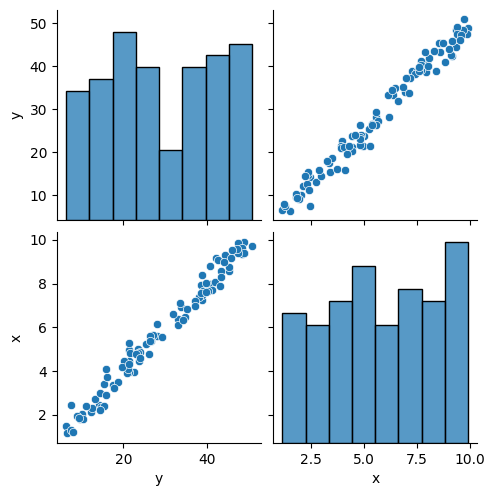

In [ ]:
# matrix scatter
sns.pairplot(df_set1)

- If the relation is not linear, transform the data accordingly.

This relation is linear

####***OLS model***

- OLS model for the original and transformed data if required.

In [ ]:
# correlation matrix
cm = df_set1.corr(method = 'pearson')
cm

,y,x
y,1.000000,0.989468
x,0.989468,1.000000


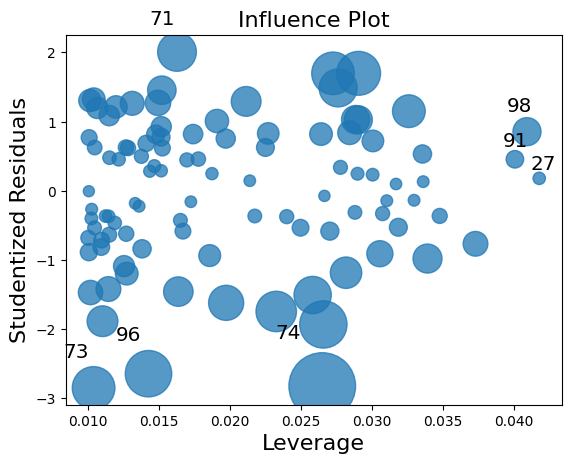

In [ ]:
# Influence plot
results_1 = smf.ols('y ~ x', data = df_set1).fit()
sm.graphics.influence_plot(results_1)
plt.show()

In [ ]:
# OLS model
intercept_1, slope_1, y_est_1, summary = ols_model(df_set1)

In [ ]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           4.47e-84
Time:                        03:12:47   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('intercept:', intercept_1)
print('slope:', slope_1)
print('R-squared:', 0.979)

intercept: 0.23807024664959853
slope: 4.984258547666895
R-squared: 0.979


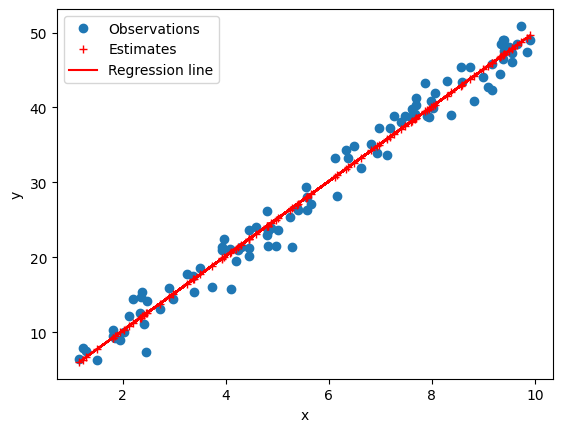

In [ ]:
plot_regression(df_set1.x, df_set1.y, y_est_1)

**OLS assumptions: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.**



**Y = 0.2381 + 4.9843X** </br>
X predicted Y, R2 = .98, F(1,98) = 4579.14, p < .001 </br>
β = 4.98, p < .001, α = 0.24, p = .613</br>
</br>
The slope: b₁=4.9843 CI[4.8381, 5.1304] means that when you increase X by 1, the value of Y increases by 4.9843.
The y-intercept: b₀=0.2381 CI[-0.6925, 1.1686] means that when X equals 0, the prediction of Y's value is 0.2381.
The x-intercept equals -0.04776.</br>
</br>
The number of independent values that can vary in an analysis (DF Residuals n-(k+1)) is 98. The degree to which the dependent variables in x explain the variation in the dependent variable y (R squared) is 0.979, so, we can say that 97.9% variance is explained by the model. F statistic = Explained variance / unexplained variance at 4579. Std err is the error of each variable (distance away from regression line) in the intercept = 0.469 and x = 0.074. Acceptance region coeficient [0.025,0.975] in our case is -0.693 1.169 in the intercept and 4.838 5.130 in x. Omnibus determines whether the explained variance in a set of data is significantly greater than the unexplained variance in the aggregate. We hope that the Omnibus score is close to 0 and the probability is close to 1, in our case the Omnibus is 4.971 and probability 0.083. Skew should be close to 0, our skew is -0.536 and the expected value of kurtosis is 3 that is the obtained value at 2.988.

##**Set 2**


---



In [ ]:
df_set2 = df_assig[1]
df_set2.head()

,y,x
0,28.045621,4.299210
1,39.148284,4.528143
2,17.361044,3.284988
3,18.413561,5.709732
4,7.857464,3.242708


- Scatter plot to decide if a linear model is appropriate

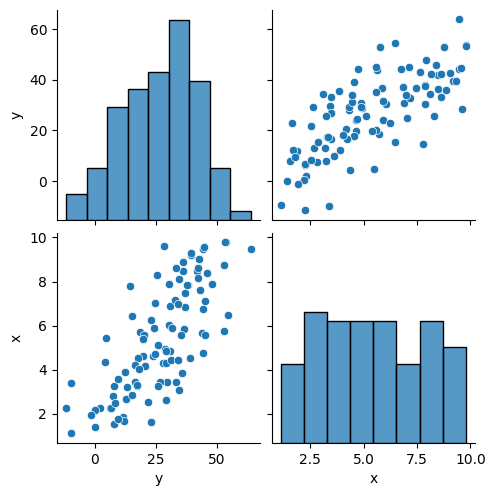

In [ ]:
# matrix scatter
sns.pairplot(df_set2)

- If the relation is not linear, transform the data accordingly.

This relation is linear

####***OLS model***

- OLS model for the original and transformed data if required.

In [ ]:
# correlation matrix
cm = df_set2.corr(method = 'pearson')
cm

,y,x
y,1.000000,0.745168
x,0.745168,1.000000


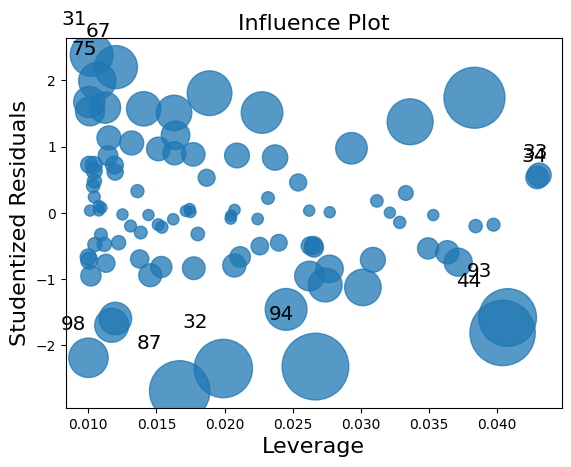

In [ ]:
# Influence plot
results_2 = smf.ols('y ~ x', data = df_set2).fit()
sm.graphics.influence_plot(results_2)
plt.show()

In [ ]:
# OLS model
intercept_2, slope_2, y_est_2, summary_2 = ols_model(df_set2)

In [ ]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           4.47e-84
Time:                        03:12:47   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('intercept:', intercept_2)
print('slope:', slope_2)
print('R-squared:',	0.979)

intercept: 1.095552065545124
slope: 4.7773536886574695
R-squared: 0.979


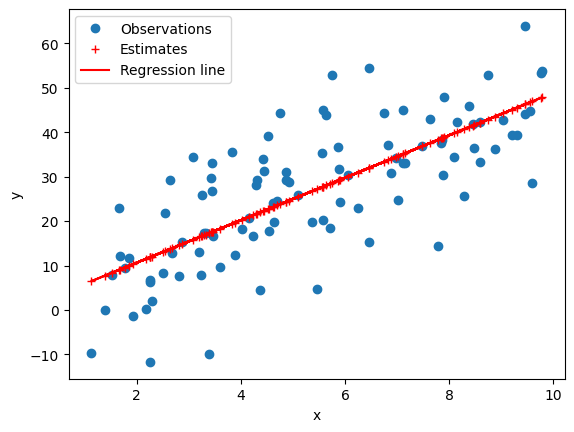

In [ ]:
plot_regression(df_set2.x, df_set2.y, y_est_2)

**OLS assumptions: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.**



**Y = 1.0956 + 4.7774X** </br>
X predicted Y, R2 = .56, F(1,98) = 122.36, p < .001</br>
β = 4.78, p < .001, α = 1.1, p = .668</br>
</br>
The slope: b₁=4.7774 CI[3.9203, 5.6344] means that when you increase X by 1, the value of Y increases by 4.7774.
The y-intercept: b₀=1.0956 CI[-3.9581, 6.1493] means that when X equals 0, the prediction of Y's value is 1.0956.
The x-intercept equals -0.2293.</br>
</br>
The number of independent values that can vary in an analysis (DF Residuals n-(k+1)) is 98. The degree to which the dependent variables in x explain the variation in the dependent variable y (R squared) is 0.979, so, we can say that 97.9% variance is explained by the model. F statistic = Explained variance / unexplained variance at 4579. Std err is the error of each variable (distance away from regression line) in the intercept = 0.469 and x = 0.074. Acceptance region coeficient [0.025,0.975] in our case is -0.693 1.169 in the intercept and 4.838 5.130 in x. Omnibus determines whether the explained variance in a set of data is significantly greater than the unexplained variance in the aggregate. We hope that the Omnibus score is close to 0 and the probability is close to 1, in our case the Omnibus is 4.971 and probability 0.083. Skew should be close to 0 our skew is -0.536 and the expected value of kurtosis is 3 that is the obtained value at 2.988.

##**Set 3**


---



In [ ]:
df_set3 = df_assig[2]
df_set3.head()

,y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599267,9.773
3,5491.450053,8.428
4,2838.820108,5.752


- scatter plot to visually decide if a linear model is appropriate

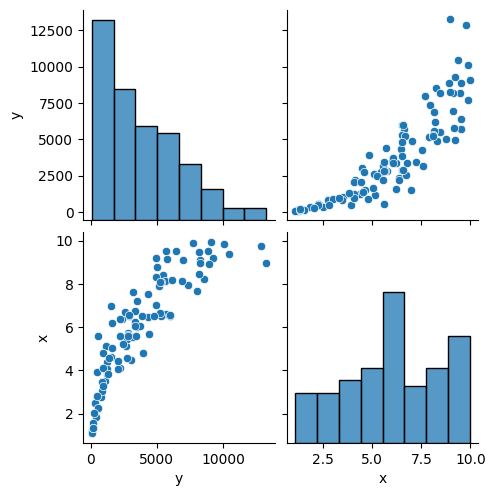

In [ ]:
# matrix scatter
sns.pairplot(df_set3)

- If the relation is not linear, transform the data accordingly.

In [ ]:
# square-root transformation
df_set3_t = df_set3.copy()
df_set3_t['y'] = np.sqrt(df_set3_t.y)

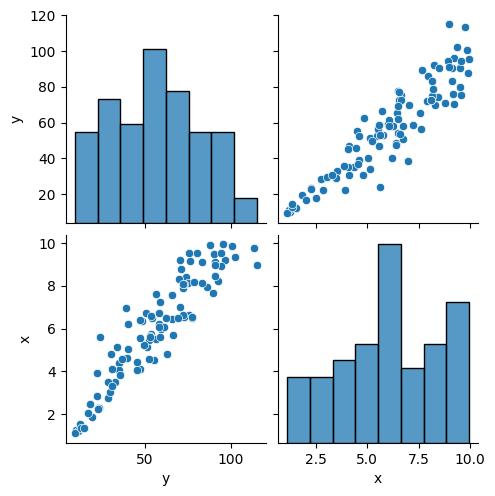

In [ ]:
sns.pairplot(df_set3_t)

- OLS model for the original and transformed data if required.

####***OLS model for the Original data***

In [ ]:
# correlation matrix
cm = df_set3.corr(method = 'pearson')
cm

,y,x
y,1.000000,0.869031
x,0.869031,1.000000


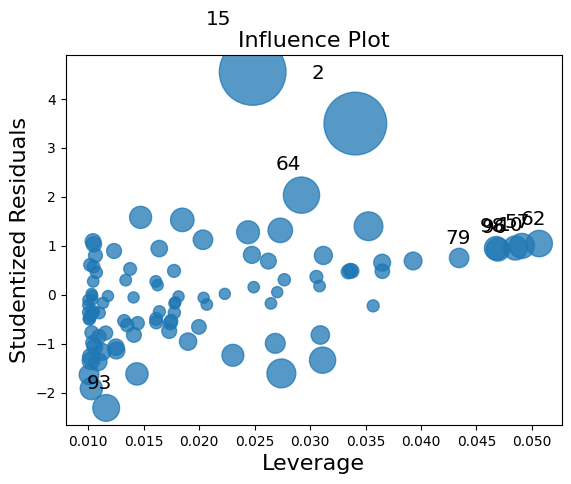

In [ ]:
# Influence plot
results_3 = smf.ols('y ~ x', data = df_set3).fit()
sm.graphics.influence_plot(results_3)
plt.show()

In [ ]:
# OLS model
intercept_3, slope_3, y_est_3, summary_3 = ols_model(df_set3)

In [ ]:
summary_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.04e-31
Time:                        03:12:53   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('intercept:', intercept_3)
print('slope:', slope_3)
print('R-squared:', 0.755)

intercept: -2636.1748393061202
slope: 1081.8265912024276
R-squared: 0.755


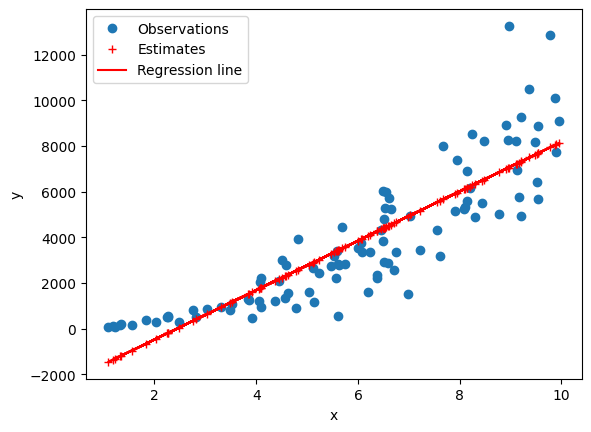

In [ ]:
plot_regression(df_set3.x, df_set3.y, y_est_3)

####***OLS model for the transformed data***

In [ ]:
# correlation matrix
cm = df_set3_t.corr(method = 'pearson')
cm

,y,x
y,1.000000,0.925824
x,0.925824,1.000000


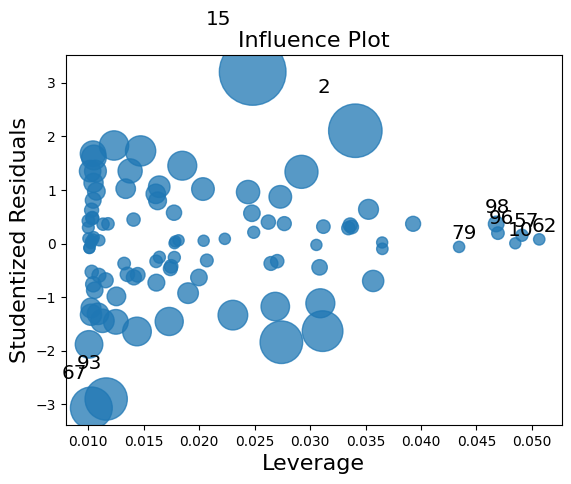

In [ ]:
# Influence plot
results_3_t = smf.ols('y ~ x', data = df_set3_t).fit()
sm.graphics.influence_plot(results_3_t)
plt.show()

In [ ]:
# OLS model
intercept_3_t, slope_3_t, y_est_3_t, summary_3_t = ols_model(df_set3_t)

In [ ]:
summary_3_t

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     588.0
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           3.37e-43
Time:                        03:12:54   Log-Likelihood:                -369.26
No. Observations:                 100   AIC:                             742.5
Df Residuals:                      98   BIC:                             747.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2001      2.612     -0.842      0.402      -7.384       2.984
x              9.7861      0.404     24.249      0.000       8.985      10.587
==============================================================================
Omnibus:                        2.926   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.648
Skew:                          -0.150   Prob(JB):                        0.266
Kurtosis:                       3.739   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('intercept:', intercept_3_t)
print('slope:', slope_3_t)
print('R-squared:', 0.857)

intercept: -2.200087854659253
slope: 9.78605647582467
R-squared: 0.857


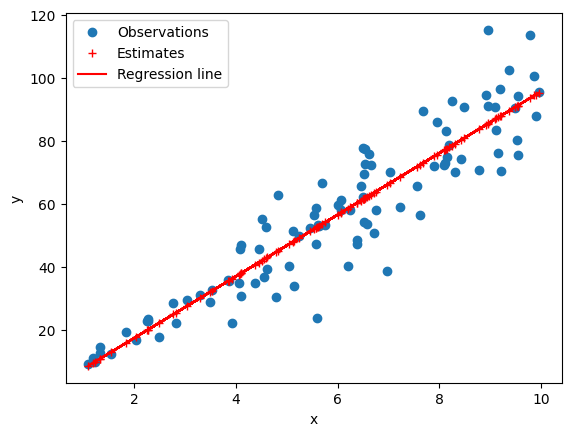

In [ ]:
plot_regression(df_set3_t.x, df_set3_t.y, y_est_3_t)

**OLS assumptions: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.**



**Y = -2636.1748 + 1081.8266X** </br>
X predicted Y, R2 = .76, F(1,98) = 302.35, p < .001 </br>
β = 1081.83, p < .001, α = -2636.17, p = .000 </br>
</br>
The slope: b₁=1081.8266 CI[958.3611, 1205.2921] means that when you increase X by 1, the value of Y increases by 1081.8266.
The y-intercept: b₀=-2636.1748 CI[-3435.4003, -1836.9493] means that when X equals 0, the prediction of Y's value is -2636.1748.
The x-intercept equals 2.4368.</br>
</br>
The number of independent values that can vary in an analysis (DF Residuals n-(k+1)) is 98. The degree to which the dependent variables in x explain the variation in the dependent variable y (R squared) is 0.755, so, we can say that 75.5% variance is explained by the model. F statistic = Explained variance / unexplained variance at 302.4. Std err is the error of each variable (distance away from regression line) in the intercept = 402.741 and x = 62.216. Acceptance region coeficient [0.025,0.975] in our case is .3435.40 -1836.94 in the intercept and 958.39 1205.29 in x. Omnibus determines whether the explained variance in a set of data is significantly greater than the unexplained variance in the aggregate. We hope that the Omnibus score is close to 0 and the probability is close to 1, however in our case the Omnibus is 21.17 and probability 0.000. Skew should be close to 0, in our case skew is 0.863 and  the expected value of kurtosis is 3 for our model is 5.475.

**How the transformation impacted the different assumptions.**

**Y = -2.2008 + 9.7860 X** <br/>
X predicted Y, R2 = .86, F(1,98) = 588.03, p < .001<br/>
β = 9.79, p < .001, α = -2.2, p = 1.598 <br/>
<br/>
The slope: b₁=9.7860 CI[8.9852, 10.5869] means that when you increase X by 1, the value of Y increases by 9.7860.
The y-intercept: b₀=-2.2008 CI[-7.3842, 2.984] means that when X equals 0, the prediction of Y's value is -2.2008.
The x-intercept equals 0.2248.<br/>
<br/>

In the transformed data the number of independent values that can vary in an analysis (DF Residuals n-(k+1)) is 98. The degree to which the dependent variables in x explain the variation in the dependent variable y (R squared) is 0.857, so, we can say that 85.7% variance is explained by the model. F statistic = Explained variance / unexplained variance at 588. Std err is the error of each variable (distance away from regression line) in the intercept = 2.612 and x = 0.404. Acceptance region coeficient [0.025,0.975] in our case is -7.38 2.94 in the intercept and 8.98 10.58 in x. Omnibus determines whether the explained variance in a set of data is significantly greater than the unexplained variance in the aggregate. We hope that the Omnibus score is close to 0 and the probability is close to 1; in our case, Omnibus is 2.926 and probability 0.232. Skew should be close to 0, in our case skew is -0.150 and the expected value of kurtosis is 3 for our model is 3.739.





After the transformation R-Squared changed from 0.860 to 0.920. This means aprox 10% increase over the original data. Correlation also increase at 0.920 showing a very strong direct relationship between X and Y. Slope 9.78 and y-intercept -2.20.

**Outliers removal and the effect in the model (slope, intercept and R-square)**


Original Data

In [ ]:
df_cleaned_3 = remove(df_set3, ['y','x'])

In [ ]:
print('Shape original data', df_set3.shape)
print('Shape after remove outliers', df_cleaned_3.shape)

Shape original data (100, 2)
Shape after remove outliers (98, 2)


In [ ]:
intercept_3_c, slope_3_c, y_est_3_c, summary_3_c = ols_model(df_cleaned_3)

In [ ]:
print('slope: ', slope_3_c)
print('intercept:', intercept_3_c)
print('R-square:', 0.788)

slope:  1015.4352407101214
intercept: -2355.9592913798374
R-square: 0.788


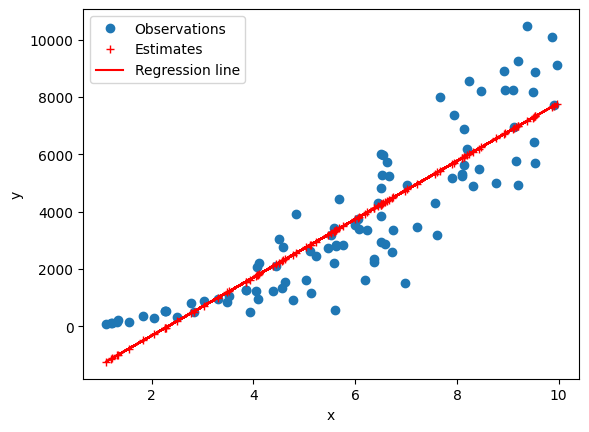

In [ ]:
plot_regression(df_cleaned_3.x, df_cleaned_3.y, y_est_3_c)

In [ ]:
summary_3_c

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     356.1
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           4.56e-34
Time:                        03:12:55   Log-Likelihood:                -839.38
No. Observations:                  98   AIC:                             1683.
Df Residuals:                      96   BIC:                             1688.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2355.9593    344.417     -6.840      0.000   -3039.622   -1672.296
x           1015.4352     53.812     18.870      0.000     908.619    1122.252
==============================================================================
Omnibus:                        0.218   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.362
Skew:                           0.094   Prob(JB):                        0.835
Kurtosis:                       2.769   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared slightly increases from 0.755 in the original data to 0.788 after remove outliers. There is not outliers in the tranform dataset.

##**Set 4**


---



In [ ]:
df_set4 = df_assig[3]
df_set4.head()

,y,x
0,1.887192e+05,5.9947
1,7.107264e+03,3.9492
2,3.729064e+06,9.6353
3,5.691779e+02,0.4943
4,3.022130e+06,9.0811


- Scatter plot to visually decide if a linear model is appropriate.

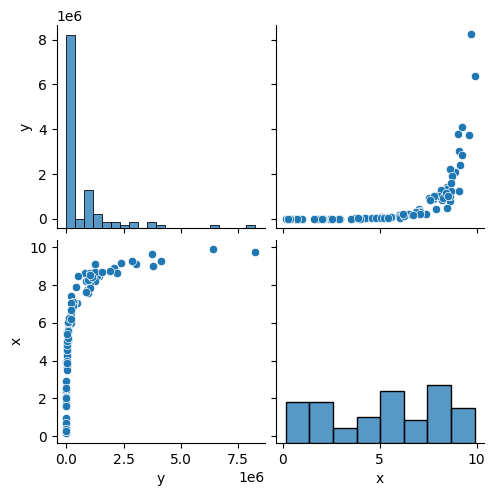

In [ ]:
# matrix scatter
sns.pairplot(df_set4)

- If the relation is not linear, transform the data accordingly.

In [ ]:
# Logarithmic transformation
df_set4_t = df_set4.copy()
df_set4_t['y'] = np.log(df_set4_t.y)

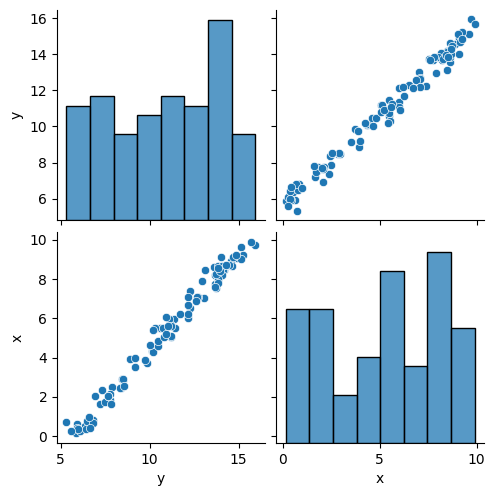

In [ ]:
sns.pairplot(df_set4_t)

- OLS model for the original and transformed data if required.

####***OLS model for the Original data***


In [ ]:
# correlation matrix
cm = df_set4.corr(method = 'pearson')
cm

,y,x
y,1.000000,0.616155
x,0.616155,1.000000


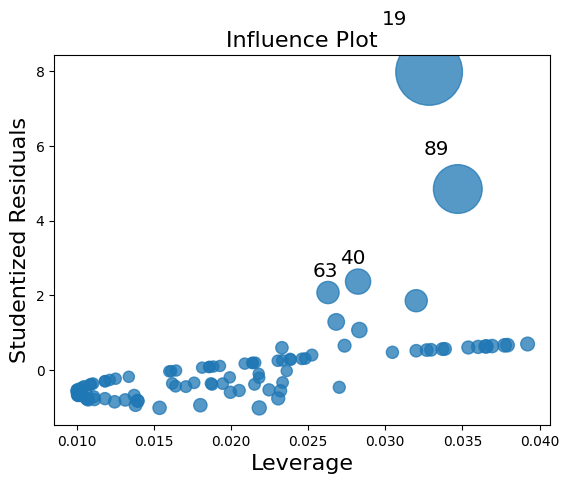

In [ ]:
# Influence plot
results_4 = smf.ols('y ~ x', data = df_set4).fit()
sm.graphics.influence_plot(results_4)
plt.show()

In [ ]:
# OLS model
intercept_4, slope_4, y_est_4, summary_4 = ols_model(df_set4)

In [ ]:
summary_4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           8.87e-12
Time:                        03:13:00   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
x           2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('intercept:', intercept_4)
print('slope:', slope_4)
print('R-squared:', 0.380)

intercept: -753498.6681300632
slope: 270653.4900620666
R-squared: 0.38


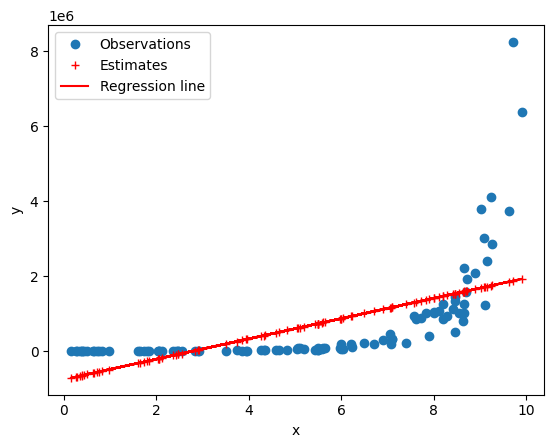

In [ ]:
plot_regression(df_set4.x, df_set4.y, y_est_4)

####***OLS model for the transformed data***

In [ ]:
# correlation matrix
cm = df_set4_t.corr(method = 'pearson')
cm

,y,x
y,1.000000,0.991608
x,0.991608,1.000000


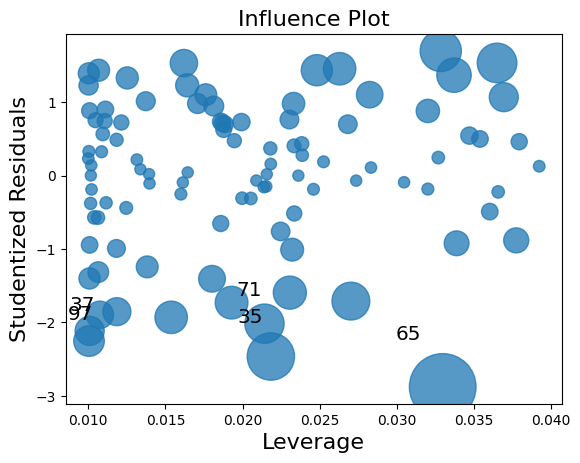

In [ ]:
# Influence plot
results_4_t = smf.ols('y ~ x', data = df_set4_t).fit()
sm.graphics.influence_plot(results_4_t)
plt.show()

In [ ]:
# OLS model
intercept_4_t, slope_4_t, y_est_4_t, summary_4_t = ols_model(df_set4_t)

In [ ]:
summary_4_t

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.91e-89
Time:                        03:13:01   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('intercept:', intercept_4_t)
print('slope:', slope_4_t)
print('R-squared:', 0.983)

intercept: 5.664721761227863
slope: 0.9898481991643173
R-squared: 0.983


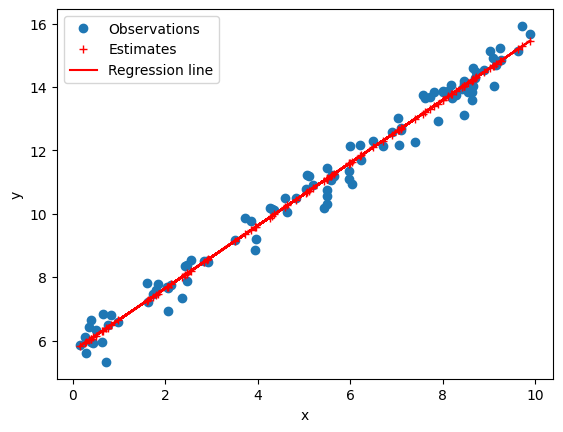

In [ ]:
plot_regression(df_set4_t.x, df_set4_t.y, y_est_4_t)

**OLS assumptions: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.**



*Original data*

**Y = -753498.6681 + 270653.4900X** </br>
X predicted Y, R2 = .38, F(1,98) = 59.97, p < .001. </br>
β = 270653.49, p < .001, α = -753498.67, p = 1.999. </br>
</br>
The slope: b₁=270653.4900 CI[201299.0848, 340007.8954] means that when you increase X by 1, the value of Y increases by 270653.4900.
The y-intercept: b₀=-753498.6681 CI[-1170537.833, -336459.5034] means that when X equals 0, the prediction of Y's value is -753498.6681.
The x-intercept equals 2.784.</br>

</br>
The slope: b₁=0.9898 CI[0.964, 1.0157] means that when you increase X by 1, the value of Y increases by 0.9898.
The y-intercept: b₀=5.6647 CI[5.5092, 5.8203] means that when X equals 0, the prediction of Y's value is 5.6647.
The x-intercept equals -5.7228.</br>

</br>
The number of independent values that can vary in an analysis (DF Residuals n-(k+1)) is 98. The degree to which the dependent variables in x explain the variation in the dependent variable y (R squared) is 0.380, so, we can say that 38% variance is explained by the model. F statistic = Explained variance / unexplained variance at 59.97. Std err is the error of each variable (distance away from regression line) in the intercept = 2.1e+05 and x = 3.49e+04. Acceptance region coeficient [0.025,0.975] in our case is -1.17e+06	-3.36e+05 in the intercept and 2.01e+05	3.4e+05 in x. Omnibus determines whether the explained variance in a set of data is significantly greater than the unexplained variance in the aggregate. We hope that the Omnibus score is close to 0 and the probability is close to 1, however in our case the Omnibus is 102.143 and probability 0.000. Skew should be close to 0 but our skew is 3.381 and the expected value of kurtosis is 3 for our model is 18.973.

**How the transformation impacted the different assumptions.**

**Y = 5.6647 + 0.9898X** </br>
X predicted Y, R2 = .98, F(1,98) = 5765.37, p < .001.</br>
β = .99, p < .001, α = 5.66, p < .001.</br>
</br>
The slope: b₁=0.9898 CI[0.964, 1.0157] means that when you increase X by 1, the value of Y increases by 0.9898.
The y-intercept: b₀=5.6647 CI[5.5092, 5.8203] means that when X equals 0, the prediction of Y's value is 5.6647.
The x-intercept equals -5.7228.</br>
</br>
In the transformed data the number of independent values that can vary in an analysis (DF Residuals n-(k+1)) is 98. The degree to which the dependent variables in x explain the variation in the dependent variable y (R squared) is 0.983, so, we can say that 98.3% variance is explained by the model. F statistic = Explained variance / unexplained variance at 5765. Std err is the error of each variable (distance away from regression line) in the intercept = 0.078 and x = 0.013. Acceptance region coeficient [0.025,0.975] in our case is 5.509  5.820 in the intercept and 0.964	1.016 in x. Omnibus determines whether the explained variance in a set of data is significantly greater than the unexplained variance in the aggregate. We hope that the Omnibus score is close to 0 and the probability is close to 1; in our case, Omnibus is 7.020 and probability 0.030. Skew should be close to 0, in our case skew is -0.657 and the expected value of kurtosis is 3 for our model is 2.872.


After the transformation R-Squared changed from 0.380 to 0.98.3. This means 60% increase over the original data. Correlation also increase at 0.991 showing a very strong direct relationship between X and Y. Slope 0.98 and y-intercept 5.66, showing a perfect fit.

**Outliers removal and the effect in the model (slope, intercept and R-square)**


Original Data

In [ ]:
df_cleaned_4 = remove(df_set4, ['y','x'])

In [ ]:
print('Shape original data', df_set4.shape)
print('Shape after remove outliers', df_cleaned_4.shape)

Shape original data (100, 2)
Shape after remove outliers (92, 2)


In [ ]:
intercept_4_c, slope_4_c, y_est_4_c, summary_4_c = ols_model(df_cleaned_4)

In [ ]:
print('slope: ', slope_4_c)
print('intercept:', intercept_4_c)
print('R-square:', 0.556)

slope:  141619.27420200876
intercept: -345528.3091071194
R-square: 0.556


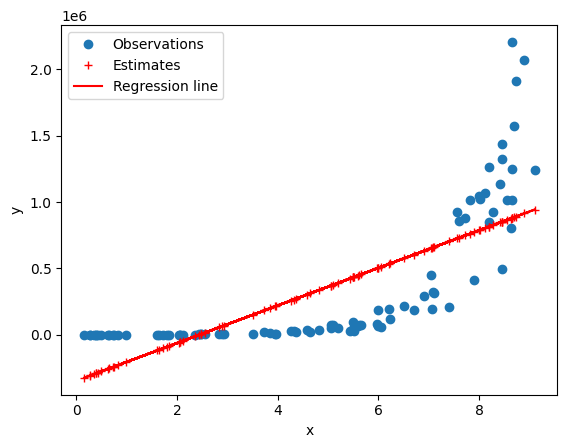

In [ ]:
plot_regression(df_cleaned_4.x, df_cleaned_4.y, y_est_4_c)

In [ ]:
summary_4_c

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     112.9
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.46e-17
Time:                        03:13:02   Log-Likelihood:                -1306.8
No. Observations:                  92   AIC:                             2618.
Df Residuals:                      90   BIC:                             2623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.455e+05    7.5e+04     -4.607      0.000   -4.95e+05   -1.97e+05
x           1.416e+05   1.33e+04     10.624      0.000    1.15e+05    1.68e+05
==============================================================================
Omnibus:                       21.563   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.267
Skew:                           1.074   Prob(JB):                     2.68e-07
Kurtosis:                       4.813   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared increases from 0.380 in the original data to 0.556 after remove outliers.

##**Set 5**


---



In [ ]:
df_set5 = df_assig[4]
df_set5.head

<bound method NDFrame.head of              y        x
0    47.320319  9.05270
1    39.862491  7.31350
2    42.225779  8.64710
3    30.010689  5.85790
4    43.900459  7.93570
..         ...      ...
96    1.027913  0.94690
97   33.965305  8.41480
98   39.077962  6.66190
99   48.254626  9.51610
100   1.032140  9.97071

[101 rows x 2 columns]>

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

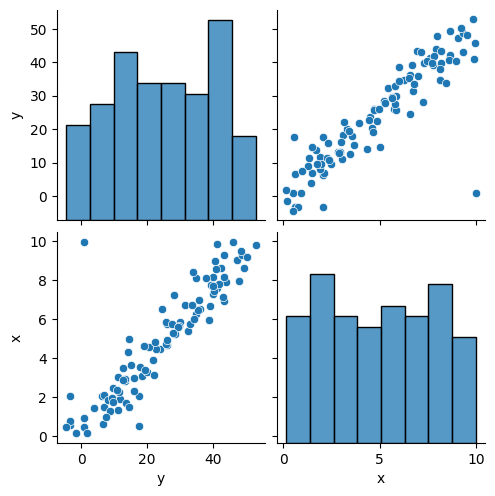

In [ ]:
# matrix scatter
sns.pairplot(df_set5)

- If the relation is not linear, transform the data accordingly.

The relation is linear with some outliers

- Create an OLS model for the original and transformed data if required.

####***OLS model for the Original data***

In [ ]:
# correlation matrix
cm = df_set5.corr(method = 'pearson')
cm

,y,x
y,1.000000,0.897892
x,0.897892,1.000000


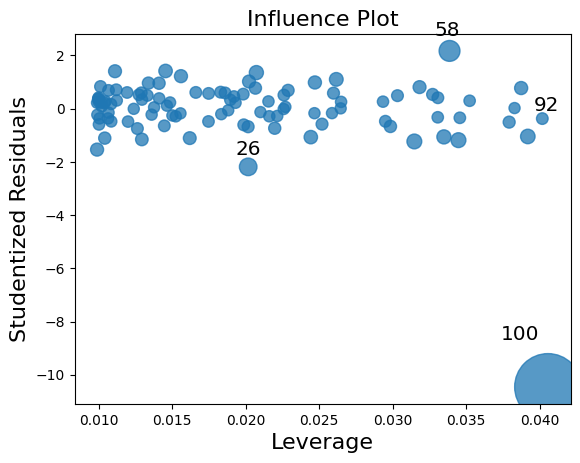

In [ ]:
# Influence plot
results_5 = smf.ols('y ~ x', data = df_set5).fit()
sm.graphics.influence_plot(results_5)
plt.show()

In [ ]:
# OLS model
intercept_5, slope_5, y_est_5, summary_5 = ols_model(df_set5)

In [ ]:
summary_5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           4.70e-37
Time:                        03:13:04   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
x              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('intercept:', intercept_5)
print('slope:', slope_5)
print('R-squared:', 0.806)

intercept: 0.9212565388609979
slope: 4.767080844219761
R-squared: 0.806


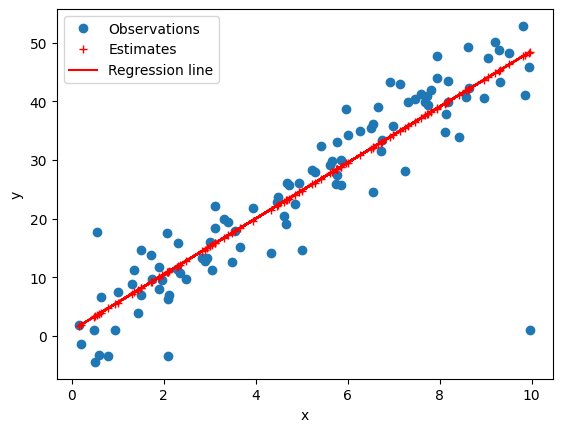

In [ ]:
plot_regression(df_set5.x, df_set5.y, y_est_5)

**OLS assumptions: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.**



**Y = 0.9212 + 4.7670 X** </br>
X predicted Y, R2 = .81, F(1,99) = 411.86, p < .001</br>
β = 4.77, p < .001, α = 0.92, p = .495</br>
</br>
The slope: b₁=4.7670 CI[4.301, 5.2332] means that when you increase X by 1, the value of Y increases by 4.7670.
The y-intercept: b₀=0.9212 CI[-1.7486, 3.5911] means that when X equals 0, the prediction of Y's value is 0.9212.
The x-intercept equals -0.1933.</br>
</br>
The number of independent values that can vary in an analysis (DF Residuals n-(k+1)) is 99. The degree to which the dependent variables in x explain the variation in the dependent variable y (R squared) is 0.806, so, we can say that 80.6% variance is explained by the model. F statistic = Explained variance / unexplained variance at 411.9. Std err is the error of each variable (distance away from regression line) in the intercept = 1.346 and x =0.235. Acceptance region coeficient [0.025,0.975] in our case is 1.749 3.591 in the intercept and 4.301 5.233 in x. Omnibus determines whether the explained variance in a set of data is significantly greater than the unexplained variance in the aggregate. We hope that the Omnibus score is close to 0 and the probability is close to 1, in our case the Omnibus is 113.783 and probability 0.000. Skew should be close to 0, for us skew is -3.591 and the expected value of kurtosis is 3 for our model is 26.691.

**Outliers removal see the effect in the model (slope, intercept and R-square)**


In [ ]:
df_cleaned_5 = remove(df_set5, ['y','x'])

In [ ]:
print('Shape original data', df_set5.shape)
print('Shape after remove outliers', df_cleaned_5.shape)

Shape original data (101, 2)
Shape after remove outliers (101, 2)


In [ ]:
intercept_5_c, slope_5_c, y_est_5_c, summary_5_c = ols_model(df_cleaned_5)

In [ ]:
print('slope: ', slope_5_c)
print('intercept:', intercept_5_c)
print('R-square:', 0.556)

slope:  4.767080844219761
intercept: 0.9212565388609979
R-square: 0.556


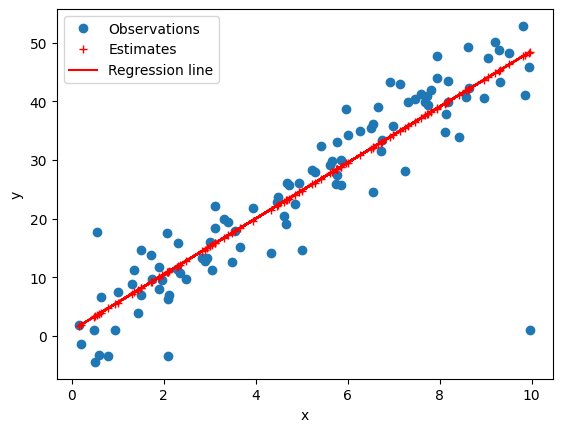

In [ ]:
plot_regression(df_cleaned_5.x, df_cleaned_5.y, y_est_5_c)

In [ ]:
summary_4_c

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     112.9
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.46e-17
Time:                        03:13:02   Log-Likelihood:                -1306.8
No. Observations:                  92   AIC:                             2618.
Df Residuals:                      90   BIC:                             2623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.455e+05    7.5e+04     -4.607      0.000   -4.95e+05   -1.97e+05
x           1.416e+05   1.33e+04     10.624      0.000    1.15e+05    1.68e+05
==============================================================================
Omnibus:                       21.563   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.267
Skew:                           1.074   Prob(JB):                     2.68e-07
Kurtosis:                       4.813   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared increases from 0.380 in the original data to 0.556 after remove outliers.

##**Set 6**


---



In [ ]:
df_set5 = df_assig[5]
df_set3.head()

,y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599267,9.773
3,5491.450053,8.428
4,2838.820108,5.752


- Scatter plot to visually decide if a linear model is appropriate.

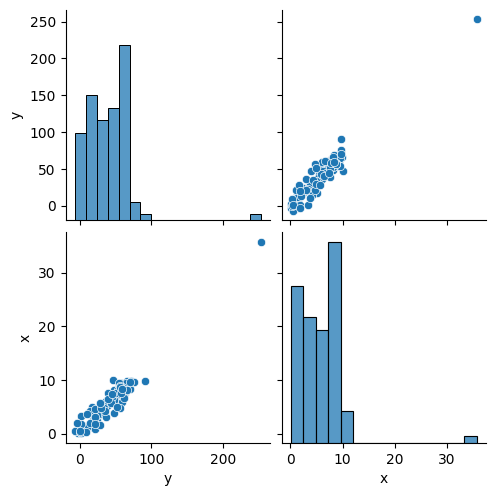

In [ ]:
# matrix scatter
sns.pairplot(df_set5)

- If the relation is not linear, transform the data accordingly.

The relation is linear

####***OLS model for the Original data***

- OLS model for the original and transformed data if required.

*OLS model for the Original data*

In [ ]:
# correlation matrix
cm = df_set5.corr(method = 'pearson')
cm

,y,x
y,1.000000,0.955578
x,0.955578,1.000000


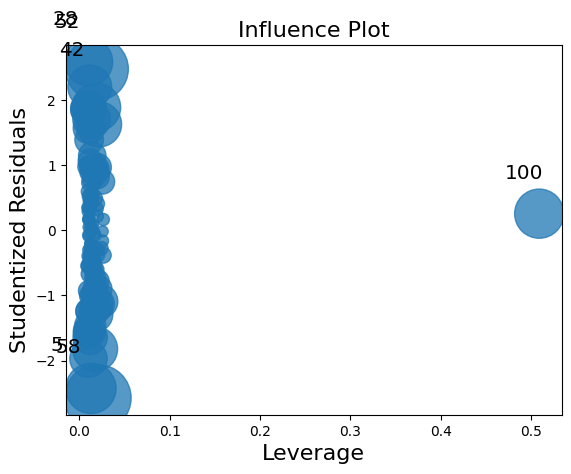

In [ ]:
# Influence plot
results_6 = smf.ols('y ~ x', data = df_set5).fit()
sm.graphics.influence_plot(results_6)
plt.show()

In [ ]:
# OLS model
intercept_5, slope_5, y_est_5, summary_5 = ols_model(df_set5)

In [ ]:
summary_5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           2.49e-54
Time:                        03:13:07   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('intercept:', intercept_5)
print('slope:', slope_5)
print('R-squared:', 0.913)

intercept: -0.3059107436463339
slope: 7.027216147378344
R-squared: 0.913


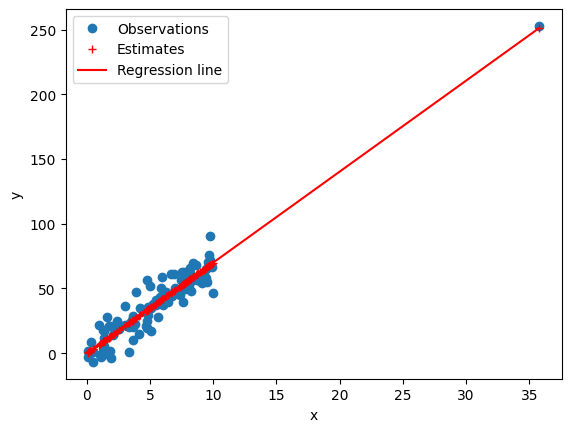

In [ ]:
plot_regression(df_set5.x, df_set5.y, y_est_5)

**OLS assumptions for the original data and transformed data.**



**Y = -0.3059 + 7.0272 X** </br>
X predicted Y, R2 = .91, F(1,99) = 1040.63, p < .001</br>
β = 7.03, p < .001, α = -0.31, p = 1.157</br>
</br>
The slope: b₁=7.0272 CI[6.595, 7.4594] means that when you increase X by 1, the value of Y increases by 7.0272.
The y-intercept: b₀=-0.3059 CI[-3.3499, 2.7391] means that when X equals 0, the prediction of Y's value is -0.3059.
The x-intercept equals 0.04346.</br>
</br>
The number of independent values that can vary in an analysis (DF Residuals n-(k+1)) is 99. The degree to which the dependent variables in x explain the variation in the dependent variable y (R squared) is 0.913, so, we can say that 91.3% variance is explained by the model. F statistic = Explained variance / unexplained variance at 1041. Std err is the error of each variable (distance away from regression line) in the intercept = 1.513 and x =0.218. Acceptance region coeficient [0.025,0.975] in our case is -3.350 2.739 in the intercept and 6.595 7.429 in x. Omnibus determines whether the explained variance in a set of data is significantly greater than the unexplained variance in the aggregate. We hope that the Omnibus score is close to 0 and the probability is close to 1, in our case the Omnibus is 0.494 and probability 0.781. Skew should be close to 0, for us skew is 0.120 and the expected value of kurtosis is 3 for our model is 3.070.

**Outliers removal and the effect in the model (slope, intercept and R-square)**


In [ ]:
df_cleaned_5 = remove(df_set5, ['y','x'])

In [ ]:
df_set5.shape

(101, 2)

In [ ]:
df_cleaned_5.shape

(100, 2)

the point that was separated from the cloud was removed

In [ ]:
# OLS model
intercept_5_c, slope_5_c, y_est_5_c, summary_5_c = ols_model(df_cleaned_5)

In [ ]:
summary_5_c

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           2.29e-40
Time:                        03:13:08   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0203      1.899     -0.011      0.991      -3.788       3.748
x              6.9703      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.877
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print('intercept:', intercept_5)
print('slope:', slope_5)
print('R-squared:',0.837)

intercept: -0.3059107436463339
slope: 7.027216147378344
R-squared: 0.837


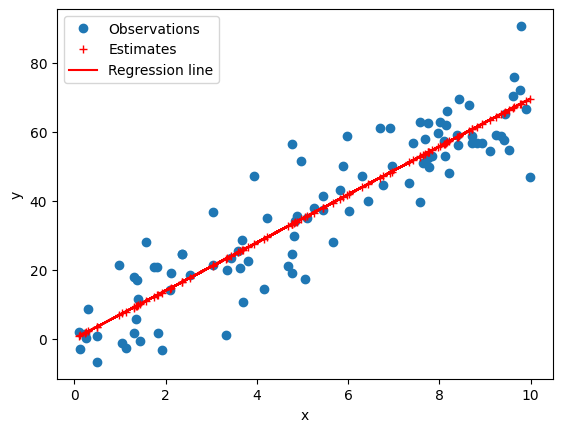

In [ ]:
# plt.scatter(df_cleaned_5.x, df_cleaned_5.y)
plot_regression(df_cleaned_5.x, df_cleaned_5.y, y_est_5_c)

R-squared slightly decrease from 0.913 in the original data to 0.837 after remove outliers. Separate data points have been removed from the data cloud.